In [1]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
import torch.nn.functional as F

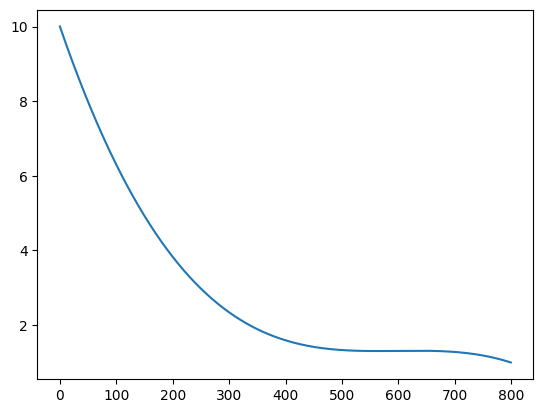

In [9]:
def depth_regression(X):
    return 1221.1025860930577 -6.13183029e+00*X + 1.03173169e-02*X**2 -5.76531414e-06*X**3

def depth_rescaling(X, old_range=[-32,1221], new_range=[1,10]):
    new_min, new_max = new_range
    old_min, old_max = old_range
    return (X - old_min) * (new_max - new_min) / (old_max - old_min) + new_min


# def depth_regression(y, img_height=800):
#     y = img_height - y
#     return np.exp( y*10 / (img_height) )

# print function on data from 0 to 800
x = np.arange(0, 800)
y = [depth_rescaling(depth_regression(i)) for i in x]
plt.plot(x, y)


In [7]:
max(y)

1221.1025860930577

In [18]:
def loss_depth_scaled_dist(out_point, tgt_point, num_boxes=1):
    loss = F.l1_loss(out_point, tgt_point, reduction='none')
    depth = torch.tensor([depth_regression(yi) for yi in tgt_point[:,1]])
    loss = loss * depth[:, None]  # None adds a new axis to scalars
    return loss.sum() / num_boxes

In [19]:
out_point = torch.tensor([
    [0,500],
    [10,200],
    ]).float()

tgt_point = torch.tensor([
    [1,500],
    [10,300],
    ]).float()

loss_depth_scaled_dist(out_point, tgt_point)

tensor([ 13.8526, 154.4485])


tensor([[1.3853e+01, 0.0000e+00],
        [0.0000e+00, 1.5445e+04]])